In [1]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

import numpy as np
from sklearn.model_selection import KFold

import matplotlib.pyplot as plt; 
import pandas as pd
plt.rcdefaults()
%matplotlib inline

import PIL
import glob
import scikitplot as skplt

In [2]:
X_train = []
input_names = ["Band 1", "Band 2", "Band 3", "Band 4", "Band 6", "MRH", "MSH", "MTE", "MVI"]
X_names = np.asarray(input_names)

y_train = []

In [3]:
folder = "../satyam_rad_sat_mod_npy/"
Sa1_files_all = glob.glob("../satyam_rad_sat_mod_npy/sa1_npy/*.npy")
Sa1_files_all

['../satyam_rad_sat_mod_npy/sa1_npy/sat.2017030620.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017010216.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017030920.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017010218.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017030919.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017010219.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017031318.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017010220.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017031319.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017012116.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017031320.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017012118.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017032119.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017012119.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017032716.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017012120.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017032718.npy',
 '../satyam_rad_sat_mod_npy/sa1

In [4]:
# Test Train Split for Files
import random
import math
SEED = 42
random.seed(SEED)
random.shuffle(Sa1_files_all)

Sa1_files_all.sort()

size_Sa1 = len(Sa1_files_all)

Sa1_files_train_size = math.ceil(size_Sa1*.75)
Sa1_files_test_size = size_Sa1 - Sa1_files_train_size

Sa1_files_train = Sa1_files_all[:Sa1_files_train_size]
Sa1_files_test = Sa1_files_all[Sa1_files_train_size:]

In [5]:
np.size(Sa1_files_train)

262

In [6]:
np.size(Sa1_files_test)

87

In [7]:
Sa1_files_train

['../satyam_rad_sat_mod_npy/sa1_npy/sat.2017010216.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017010218.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017010219.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017010220.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017012116.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017012118.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017012119.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017012120.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017012216.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017012218.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017012219.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017012220.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017012418.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017012419.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017012420.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017020620.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017020716.npy',
 '../satyam_rad_sat_mod_npy/sa1

In [8]:
Sa1_files_test

['../satyam_rad_sat_mod_npy/sa1_npy/sat.2017072020.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017072116.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017072118.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017072119.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017072120.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017072519.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017072520.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017080916.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017080918.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017080919.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017080920.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017081616.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017081618.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017081619.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017081620.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017081818.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017081819.npy',
 '../satyam_rad_sat_mod_npy/sa1

In [9]:
# Training with training images only
for filename in Sa1_files_train:
    filename = filename.split('/')[-1]
    
    # Satellite 1
    Sa_1_File = folder + "sa1_npy/" + filename;
    Sa1arr = np.load(Sa_1_File).flatten()
    
    
    # Satellite 2
    Sa_2_File = folder + "sa2_npy/" + filename;
    Sa2arr = np.load(Sa_2_File).flatten()
    
    
    # Satellite 3
    Sa_3_File = folder + "sa3_npy/" + filename;
    Sa3arr = np.load(Sa_3_File).flatten()
    
    # Satellite 4
    Sa_4_File = folder + "sa4_npy/" + filename;
    Sa4arr = np.load(Sa_4_File).flatten()
    
    # Satellite 6
    Sa_6_File = folder + "sa6_npy/" + filename;
    Sa6arr = np.load(Sa_6_File).flatten()
    
    
    # Model Data has wrong orientation relative to the satellite
    # Thus using flipud
    
    # MRH
    MRH_File = folder + "mrh_npy/" + filename.replace('sat', "mod", 1)
    MRHarr = np.flipud(np.load(MRH_File)).flatten()
    
    # MSH
    MSH_File = folder + "msh_npy/" + filename.replace('sat', "mod", 1)
    MSHarr = np.flipud(np.load(MSH_File)).flatten()
    
    # MTE
    MTE_File = folder + "tem_npy/" + filename.replace('sat', "mod", 1)
    MTEarr = np.flipud(np.load(MTE_File)).flatten()
    
    # MVI
    MVI_File = folder + "vis_npy/" + filename.replace('sat', "mod", 1)
    MVIarr = np.flipud(np.load(MVI_File)).flatten()
    
    # Radar Data has wrong orientation relative to the satellite
    # Thus using flipud
    
    # Radar
    Radar_File = folder + "rad_npy/" + filename.replace('sat', "rad", 1)
    Radararr = np.flipud(np.load(Radar_File)).flatten()
    
    
    
    for i in range(len(Sa1arr)):
        x = [];
        x.append(Sa1arr[i])
        x.append(Sa2arr[i])
        x.append(Sa3arr[i])
        x.append(Sa4arr[i])
        x.append(Sa6arr[i])
        
        x.append(MRHarr[i])
        x.append(MSHarr[i])
        x.append(MTEarr[i])
        x.append(MVIarr[i])
        
        # clip 0
        x = np.array(x)
        x[x < 0] = 0
        x = x.tolist()
        
        y_train.append(Radararr[i])
        
        X_train.append(x)

In [10]:
X_train = np.array(X_train)
y_train = np.array(y_train)

In [11]:
print(X_train.shape)
print(np.std(X_train))
print(np.min(X_train))
print(np.mean(X_train))
print(np.max(X_train))

(17170432, 9)
7852.1443946772615
0.0
7954.8010841423975
30993.517578125


In [12]:
print(y_train.shape)
print(np.std(y_train))
print(np.min(y_train))
print(np.mean(y_train))
print(np.max(y_train))

(17170432,)
21.281247054536355
0
20.616795372416956
953


In [13]:
# Train the Training set

In [14]:
reg_train = linear_model.LinearRegression()
reg_train.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [15]:
for feat, score in zip(X_names, reg_train.coef_):
    print('{}       {}'.format(feat, score))

Band 1       0.00011407170861435622
Band 2       -0.00012350015085108468
Band 3       0.0009208896656808898
Band 4       0.001684574177728654
Band 6       -0.0034009985522007466
MRH       -0.04108251727233685
MSH       1185.362495977048
MTE       -0.04009491592645743
MVI       -0.0011620281424808607


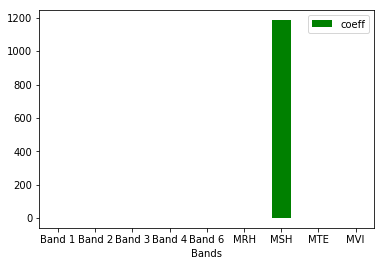

In [16]:
df = pd.DataFrame({'Bands':input_names, 'coeff':reg_train.coef_})
df.plot.bar(x='Bands', y='coeff', rot=0, color=('g'))
plt.show()

In [17]:
# Evaluate the Trained output

In [18]:
predictions_train = reg_train.predict(X_train)

In [19]:
errors_train = abs(predictions_train - y_train)
np.max(errors_train)

901.9034717088655

(array([1.03797521e-02, 9.01504604e-05, 1.66334404e-05, 4.45628068e-06,
        1.41779638e-06, 5.13951187e-07, 1.67446641e-07, 6.05007937e-08,
        1.89446930e-08, 8.55566779e-09]),
 array([  0. ,  95.3, 190.6, 285.9, 381.2, 476.5, 571.8, 667.1, 762.4,
        857.7, 953. ]),
 <a list of 10 Patch objects>)

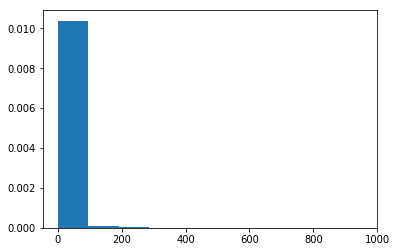

In [20]:
plt.hist(y_train, density=1)

(array([1.10193687e-02, 5.14475193e-05, 1.14715983e-05, 3.48248408e-06,
        1.20172499e-06, 4.54602039e-07, 1.51749260e-07, 5.68252548e-08,
        1.74350214e-08, 8.39463992e-09]),
 array([6.71659961e-07, 9.01903478e+01, 1.80380695e+02, 2.70571042e+02,
        3.60761389e+02, 4.50951736e+02, 5.41142083e+02, 6.31332430e+02,
        7.21522778e+02, 8.11713125e+02, 9.01903472e+02]),
 <a list of 10 Patch objects>)

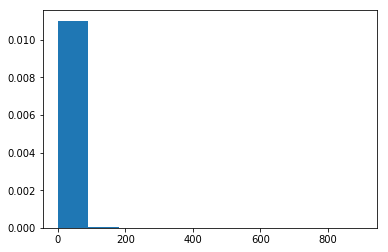

In [21]:
plt.hist(errors_train, density=1)

In [22]:
# Confusion Matrix

In [23]:
y_train_no_zero = list(filter(lambda a: a != 0, y_train))
print(np.shape(y_train_no_zero))
print(np.std(y_train_no_zero))
print(np.min(y_train_no_zero))
print(np.mean(y_train_no_zero))
print(np.max(y_train_no_zero))

(16973468,)
21.287491448825545
1
20.856037375508645
953


In [24]:
thershold = np.mean(y_train_no_zero) + 1 * np.std(y_train_no_zero)
thershold

42.14352882433419

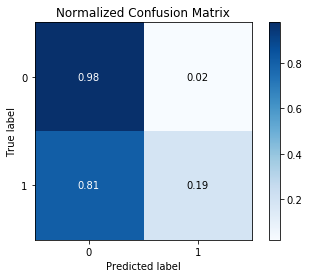

In [25]:
y_train_copy = np.copy(y_train)
y_train_copy[y_train_copy < thershold] = 0
y_train_copy[y_train_copy >= thershold] = 1

predictions_train_copy = np.copy(predictions_train)
predictions_train_copy[predictions_train_copy < thershold] = 0
predictions_train_copy[predictions_train_copy >= thershold] = 1

skplt.metrics.plot_confusion_matrix(y_train_copy, predictions_train_copy, normalize=True)
plt.show()

In [26]:
from sklearn.metrics import confusion_matrix
FPR = []
TPR = []

for i in range(1, 531, 10):
    y_train_copy = np.copy(y_train)
    y_train_copy[y_train_copy < i] = 0
    y_train_copy[y_train_copy >= i] = 1

    predictions_train_copy = np.copy(predictions_train)
    predictions_train_copy[predictions_train_copy < i] = 0
    predictions_train_copy[predictions_train_copy >= i] = 1
    
    temp = confusion_matrix(y_train_copy, predictions_train_copy)
    
    TN = temp[0][0]
    FP = temp[0][1]
    FN = temp[1][0]
    TP = temp[1][1]
    
    TPR_ = TP/(TP+FN)
    FPR_ = FP/(TN+FP)
    
    FPR.append(FPR_)
    TPR.append(TPR_)

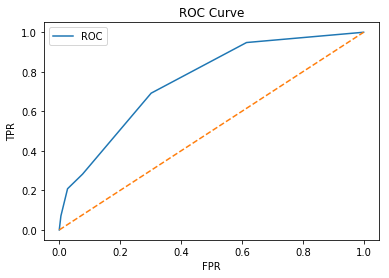

In [27]:
plt.plot(FPR, TPR, label='ROC')
plt.plot([0,1], [0,1], linestyle='dashed')
plt.title("ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR");
plt.legend()

In [28]:
# Save the Model
import pickle
filename = 'MODEL_OUT_Final_Linear_Regression_1x1_npy_SA_MOD.sav'
pickle.dump(reg_train, open(filename, 'wb'))